In [1]:
#导入第三方包
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import scipy.stats.mstats as mst

import matplotlib as mpl


plt.style.use('ggplot')

#设定目录及读取数据文件
dir = './data/prophet/'
train = pd.read_table(dir + 'train_20171215.txt',engine='python')
test_A = pd.read_table(dir + 'test_A_20171225.txt',engine='python')
sample_A = pd.read_table(dir + 'sample_A_20171225.txt',engine='python',header=None)
sample_A.columns = ['date','day_of_week']
train

,date,day_of_week,brand,cnt
0,1,3,1,20
1,1,3,5,48
2,2,4,1,16
3,2,4,3,20
4,3,5,1,1411
5,3,5,2,811
6,3,5,3,1005
7,3,5,4,773
8,3,5,5,1565
9,4,6,1,1176


In [2]:
#合并一日期下各品牌效率
train1 = train.groupby(['date','day_of_week','brand'],as_index=False).cnt.sum()
train1['day_of_week']=train1['day_of_week'].astype('category')
train1.head(10)


,date,day_of_week,brand,cnt
0,1,3,1,20
1,1,3,5,48
2,2,4,1,16
3,2,4,3,20
4,3,5,1,1411
5,3,5,2,811
6,3,5,3,1005
7,3,5,4,773
8,3,5,5,1565
9,4,6,1,1176


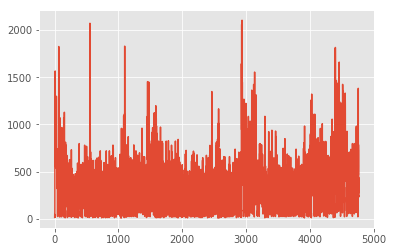

,date,brand,cnt
count,4773.000000,4773.000000,4773.000000
mean,524.399749,2.990153,380.567358
std,297.546919,1.417509,252.720918
min,1.000000,1.000000,12.000000
25%,271.000000,2.000000,221.000000
50%,529.000000,3.000000,351.000000
75%,781.000000,4.000000,496.000000
max,1032.000000,5.000000,2102.000000


In [3]:
#观察上牌数量曲线
plt.plot(range(len(train1)),train1['cnt'])
plt.show()
train1.describe()

In [4]:
#winsorize缩尾上下1%，去除极端值影响
train1['cnt']=mst.winsorize(train1['cnt'],limits=0.01)
train1.describe()

,date,brand,cnt
count,4773.000000,4773.000000,4773.000000
mean,524.399749,2.990153,378.089252
std,297.546919,1.417509,241.676770
min,1.000000,1.000000,17.000000
25%,271.000000,2.000000,221.000000
50%,529.000000,3.000000,351.000000
75%,781.000000,4.000000,496.000000
max,1032.000000,5.000000,1242.000000


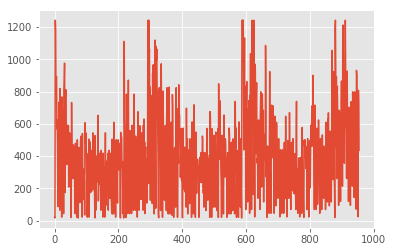

    date day_of_week  brand   cnt
0      1           3      1    20
2      2           4      1    17
4      3           5      1  1242
9      4           6      1  1176
14     5           7      1   812


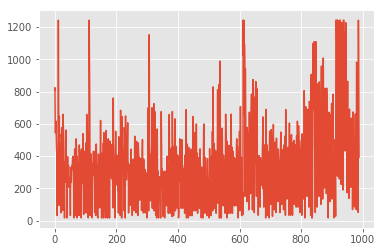

    date day_of_week  brand  cnt
5      3           5      2  811
10     4           6      2  824
15     5           7      2  549
20     6           1      2  545
25     7           2      2  618


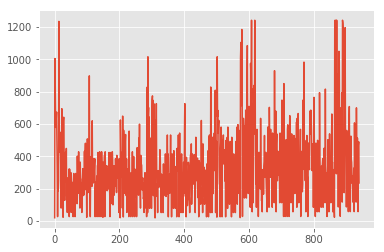

    date day_of_week  brand   cnt
3      2           4      3    20
6      3           5      3  1005
11     4           6      3   802
16     5           7      3   579
21     6           1      3   599


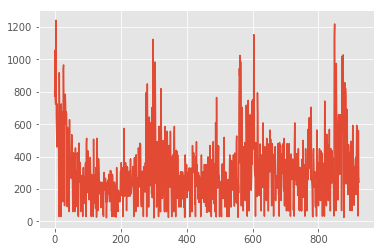

    date day_of_week  brand   cnt
7      3           5      4   773
12     4           6      4  1057
17     5           7      4   759
22     6           1      4   725
27     7           2      4  1242


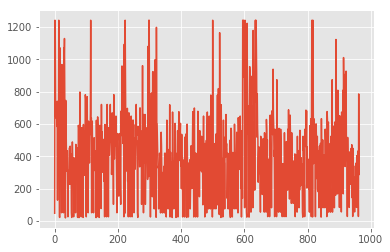

    date day_of_week  brand   cnt
1      1           3      5    48
8      3           5      5  1242
13     4           6      5  1107
18     5           7      5   647
23     6           1      5   638


In [5]:
#根据数据描述，将数据按年分为3组

names = locals()
for i in range(1,6):
    names['brand%s' % i] = train1[train1['brand']==i]
    plt.plot(range(len(names['brand%s' % i])),names['brand%s' % i]['cnt'])
    plt.show()
    print(names['brand%s' % i].head())

In [6]:
brand1.to_csv(dir + 'brand1.csv',index=False)
brand2.to_csv(dir + 'brand2.csv',index=False)
brand3.to_csv(dir + 'brand3.csv',index=False)
brand4.to_csv(dir + 'brand4.csv',index=False)
brand5.to_csv(dir + 'brand5.csv',index=False)
train1.to_csv(dir + 'train1.csv',index=False)